In [1]:
import pandas as pd
import numpy as np

def read_data(file_name):
    df = pd.read_excel(file_name)
    df = df.fillna(df.mean(numeric_only=True))  # Fill missing values with column mean for numeric columns
    df = df.iloc[:, 4:10]  # Select columns 4 to 9
    return df

df = read_data('/content/cdata_final.xlsx')

print(df.head())

   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0   
4                             

In [2]:
#1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def train_test_splits(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    return reg

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_splits(df[['Correct_code_and_output']], df['Final_Marks'])

# Train the model
model = train_model(X_train, y_train)
model

LinearRegression()

In [3]:
#2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to eval the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# for the training set
train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)

# for the testing set
test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAPE: {train_mape:.2%}, R²: {train_r2:.2f}")

print("\nTesting Set Metrics:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAPE: {test_mape:.2%}, R²: {test_r2:.2f}")

Training Set Metrics:
MSE: 2.64, RMSE: 1.63, MAPE: 11096952697985274.00%, R²: 0.43

Testing Set Metrics:
MSE: 2.74, RMSE: 1.65, MAPE: 17679890739162960.00%, R²: 0.36


In [4]:
df = read_data('/content/cdata_final.xlsx')

In [5]:
#3
# Split into train and test
y = df.iloc[:,-1]
X = df.drop('Final_Marks',axis = 1)
X_train, X_test, y_train, y_test = train_test_splits(X, y)

# Train
model = train_model(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# for the training set
train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)

# for the testing set
test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAPE: {train_mape:.2%}, R²: {train_r2:.2f}")

print("\nTesting Set Metrics:")
print(f"MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAPE: {test_mape:.2%}, R²: {test_r2:.2f}")

Training Set Metrics:
MSE: 0.00, RMSE: 0.06, MAPE: 935317922098.07%, R²: 1.00

Testing Set Metrics:
MSE: 0.00, RMSE: 0.00, MAPE: 1490167536901.79%, R²: 1.00


In [6]:
#4
from sklearn.cluster import KMeans
import pandas as pd

# prepare data by removing the target variable
def prepare_data(df, target_column):
    X = df.drop(columns=[target_column])
    return X

# perform K-means clustering
def perform_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

def add_cluster_labels(df, kmeans):
    df['Cluster'] = kmeans.labels_
    return df

def main(df, target_column, n_clusters=3):
    X = prepare_data(df, target_column)
    kmeans = perform_kmeans(X, n_clusters)
    df_with_clusters = add_cluster_labels(df, kmeans)
    return df_with_clusters, kmeans

df_with_clusters, kmeans_model = main(df, target_column='Final_Marks', n_clusters=2)

print(df_with_clusters.head())

# Optionally, analyze the cluster centers
print("Cluster Centers:\n", kmeans_model.cluster_centers_)

   Header_and_Main_Declaration  Incomprehensible_Code  \
0                            2                    2.0   
1                            2                    2.0   
2                            2                    2.0   
3                            2                    1.0   
4                            2                    2.0   

   Comprehensible_Code_with_logical_errors  \
0                                        2   
1                                        2   
2                                        1   
3                                        1   
4                                        1   

   Comprehensible_code_with_syntax_errors  Correct_code_and_output  \
0                                     2.0                        2   
1                                     2.0                        0   
2                                     1.0                        1   
3                                     1.0                        0   
4                             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
#5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

# Silhouette Score
silhouette = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", silhouette)
# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print("Calinski-Harabasz Score:", ch_score)
# Davies-Bouldin Score
db_score = davies_bouldin_score(X_train, kmeans.labels_)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.28634883957844187
Calinski-Harabasz Score: 352.2742594991912
Davies-Bouldin Score: 1.5252685856083787


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

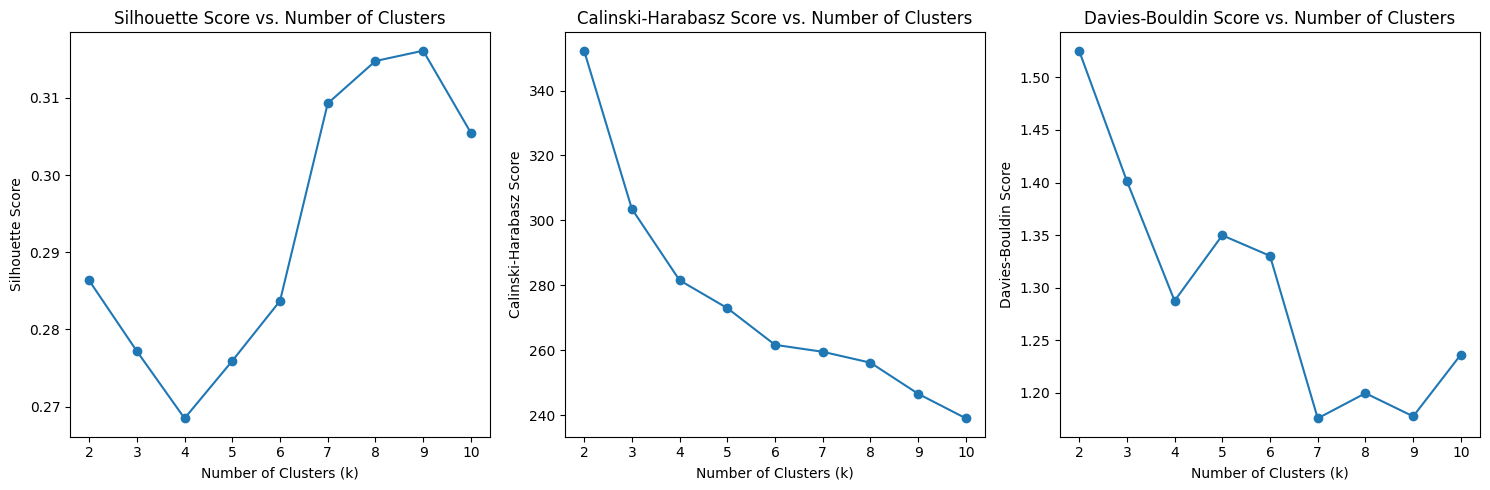

In [8]:
#6
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans(X, k_values):
    silhouette_scores = []
    ch_scores = []
    db_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_

        silhouette_scores.append(silhouette_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return silhouette_scores, ch_scores, db_scores

def plot_scores(k_values, silhouette_scores, ch_scores, db_scores):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')

    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_scores, marker='o')
    plt.title('Davies-Bouldin Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Score')

    plt.tight_layout()
    plt.show()

# Define the range of k values to test
k_values = range(2, 11)

# Evaluate K-means clustering for each k
silhouette_scores, ch_scores, db_scores = evaluate_kmeans(X_train, k_values)

# Plot the scores against k
plot_scores(k_values, silhouette_scores, ch_scores, db_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

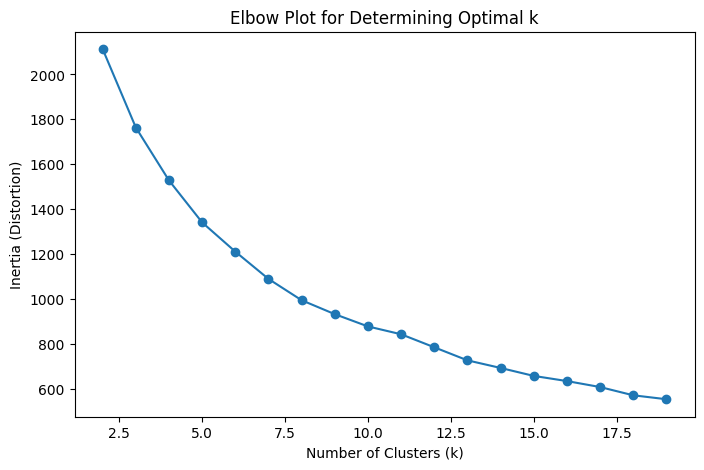

In [9]:
#7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize the list to store the inertia values
distortions = []

# Define the range of k values to test
k_values = range(2, 20)

# Calculate distortions (inertia) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    distortions.append(kmeans.inertia_)

# Plot the distortions to create the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Plot for Determining Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.show()